In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from implementations import *
%load_ext autoreload
%autoreload 2
%matplotlib notebook


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [6]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [6]:
y.shape, tX.shape


((250000,), (250000, 30))

## Do your thing crazy machine learning thing here :) ...

## Gradient Descent test:

In [4]:
"""taken from ex02:"""
# from gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 1e-9

# Initialization
w_initial = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
#A=tX[0:30]
#b=y[0:30]
#w_initial=np.linalg.lstsq(A,b,rcond=None)[0]
print(np.shape(tX))

b=variance_half_max_index(tX)
tX1=tX[:,b]
print(np.shape(tX1))

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_w, gradient_loss = least_squares(y, tX1)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
print("gradient loss = ", gradient_loss, "\n W = ",gradient_w)

(250000, 30)
(250000, 24)
Gradient Descent: execution time=0.051 seconds
gradient loss =  0.3559770984135593 
 W =  [ 2.26971848e-04  6.56522489e-04 -2.07872311e-03  2.66859544e+00
  3.25911884e-04  2.67330024e+00  5.00287345e-03 -9.31223839e-03
 -1.75704625e-03 -2.00046630e-03  2.66082659e+00 -2.66378165e+00
 -6.79222194e-04  2.79992082e-04 -3.52941170e-02 -6.10160688e-03
 -1.00960843e-02  1.08584292e-01 -5.86224270e-02  1.14536818e-03
 -4.51466862e-04 -1.26157626e-03  1.86677641e-03  5.58306206e-04]


## Least squares (using normal equations) test:

In [5]:
# Start.
start_time = datetime.datetime.now()
weights, loss = least_squares(y, tX)
end_time = datetime.datetime.now()

# Print result

exection_time = (end_time - start_time).total_seconds()
print("Least squares: execution time={t:.3f} seconds".format(t=exection_time))
print("Loss = ", loss, "\n W = ", weights)

Least squares: execution time=0.495 seconds
Loss =  0.3396868094770345 
 W =  [ 8.03494350e-05 -7.20202266e-03 -6.05417273e-03 -5.47559077e-04
 -1.93874687e-02  4.73451613e-04 -2.60379057e-02  3.25106299e-01
 -3.80780015e-05 -2.72785402e+00 -2.21220141e-01  9.50794097e-02
  6.40351607e-02  2.73611370e+00 -3.31801097e-04 -9.54325136e-04
  2.74087044e+00 -5.34165258e-04  9.73498900e-04  3.69225050e-03
  3.54487183e-04 -5.43344617e-04 -3.30448035e-01 -1.40800497e-03
  8.31432840e-04  1.02117276e-03 -1.68047418e-03 -5.83664795e-03
 -1.11088002e-02  2.72831395e+00]


## Ridge regression (using normal equations) test:

In [6]:
lambda_ = 0.5

# Start.
start_time = datetime.datetime.now()
weights, loss = ridge_regression(y, tX, lambda_)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Least squares: execution time={t:.3f} seconds".format(t=exection_time))
print("Loss = ", loss, "\n W = ", weights)

Least squares: execution time=0.461 seconds
Loss =  0.3516066841491274 
 W =  [ 2.48519324e-04 -8.96465390e-03 -2.24753247e-03 -2.19688733e-03
 -8.28785858e-04  5.27482033e-04 -1.23580011e-02  2.78401608e-02
  6.37660259e-05  3.17281194e-03 -2.55552723e-02  4.56064526e-02
  1.07748012e-02  6.17277403e-03 -3.38880835e-04 -1.20732147e-03
  2.51582382e-03 -4.25916162e-04  8.32986709e-04  4.90332267e-03
  4.17025377e-04 -7.70891369e-04 -2.48302577e-02  1.45686817e-03
 -7.63838506e-04 -5.43201301e-04  2.59945303e-04  1.61198112e-03
  1.83180262e-04 -5.51499664e-03]


## Polynomial:

In [4]:
print(np.shape(tX))
tX_1, median_values_matrix = replace_999_data_elem(tX)
features=get_uncorrelated_features(tX_1)
tX_1=tX_1[:,features]
positive_columns = get_higher_minus_1(tX_1)

#tX_2 = log_inv(tX_1[:, positive_columns])

tX_1=build_poly(tX_1, 1)
#tX_1=np.concatenate((tX_1,tX_2),axis=1)

tx=tX_1

k_indices=10
#accurracy_least_squares_GD=function_cross_validation(y,tx,k_indices,least_squares_GD,True,False)
accurracy_least_squares_SGD,std_SGD=function_cross_validation(y,tx,k_indices,least_squares_SGD,True,False)
accurracy_logistic_regression_S,std_lgd=function_cross_validation(y,tx,k_indices,logistic_regression_S,True,True)
accurracy_ridge_regression,std_ridge=function_cross_validation(y,tx,k_indices,ridge_regression,False,False,lambda_=1e-4)
accuracy_least_square,std_least_square=function_cross_validation(y,tx,k_indices,ridge_regression,False,False,lambda_=0)
accuracy_newton_logistic_regression_s,std_nlr=function_cross_validation(y,tx,k_indices,newton_logistic_regression_s,True,True)
#print("accuracy of least squares Gd",accurracy_least_squares_GD )

print("accuracy of least squares SGd",accurracy_least_squares_SGD, "and standard deviation" , std_SGD)

print("accuracy of logistic regression S",accurracy_logistic_regression_S, "and standard deviation", std_lgd )

#print("accuracy of logistic regression",accurracy_logistic_regression )

print("accuracy of newton logistic regression ",accuracy_newton_logistic_regression_s ," and standard deviation ", std_nlr )

print("accuracy of least square ",accuracy_least_square ," and standard deviation ", std_least_square )

print("accuracy of ridge regression ",accurracy_ridge_regression ," and standard deviation ", std_ridge )


(250000, 30)
hello
0.6856800000000001
0.6892400000000001
0.68704
0.68188
0.68304
0.6856
0.68452
0.6861200000000001
0.6836800000000001
0.68328
hello
0.6582399999999999
0.66256
0.6601600000000001
0.65544
0.65308
0.6597999999999999
0.65488
0.6583600000000001
0.6570400000000001
0.65376
hello
0.7405999999999999
0.7474799999999999
0.7438
0.7405999999999999
0.74684
0.74844
0.74488
0.74468
0.74524
0.74456
hello
0.74072
0.7476
0.7438400000000001
0.7404
0.7470399999999999
0.74864
0.74484
0.74472
0.7454799999999999
0.7445999999999999
hello
0.6582399999999999
0.66256
0.6601600000000001
0.65544
0.65308
0.6597999999999999
0.65488
0.6583600000000001
0.6570400000000001
0.65376
accuracy of least squares SGd 0.6850080000000001 and standard deviation 0.002066943637354449
accuracy of logistic regression S 0.657332 and standard deviation 0.0028951297034848084
accuracy of newton logistic regression  0.657332  and standard deviation  0.0028951297034848084
accuracy of least square  0.744788  and standard devi

In [1]:
lambda_ = 0.000


## Logistic Regression

In [1]:
#Start
start_time = datetime.datetime.now()
y_train,y_train_test,tx_train,tx_train_test = split_data_train_test(y,tX,0.90)
weights, loss = logistic_regression( np.transpose(np.matrix(y_train)), standardize(tx_train), np.zeros((tX.shape[1],1)), 200, 1e-9)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Logistic Regression: execution time={t:.3f} seconds".format(t=exection_time))
print("Accuracy = ", compute_loss(y_train_test,tx_train_test,weights))

NameError: name 'datetime' is not defined

## Generate predictions and save ouput in csv format for submission:

In [8]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test1, ids_test = load_csv_data(DATA_TEST_PATH)

<IPython.core.display.Javascript object>


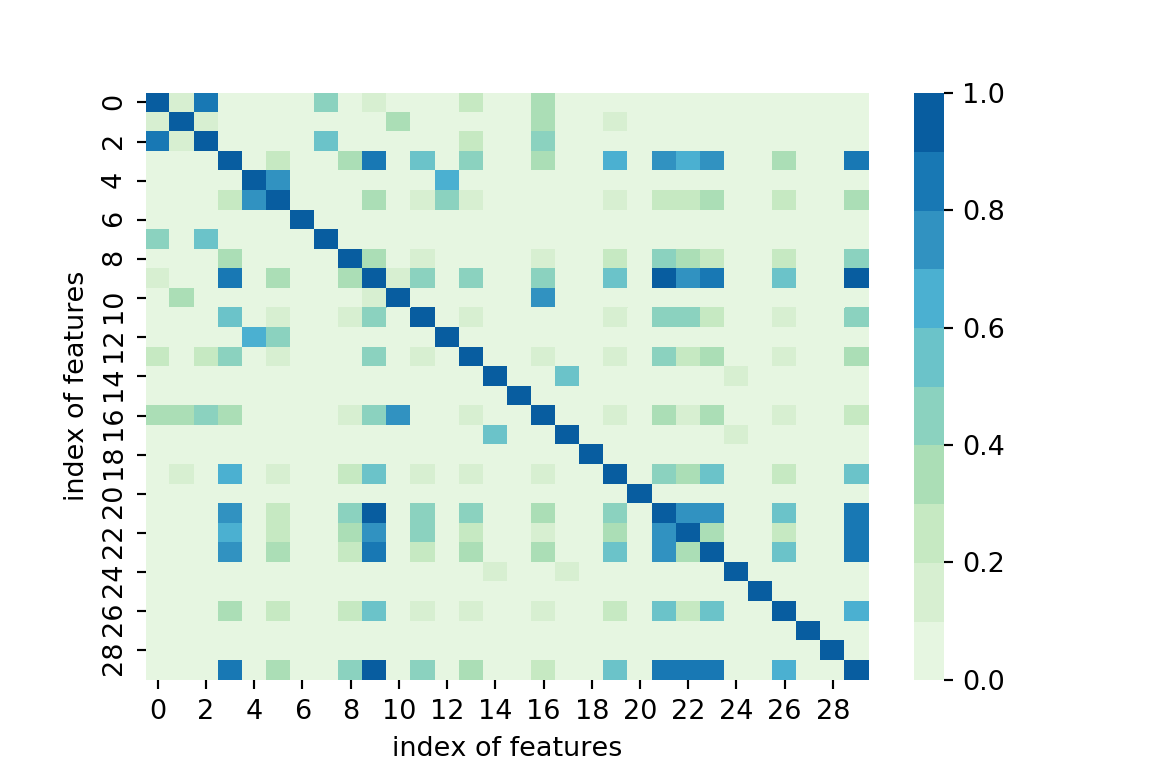

In [17]:
#tX,tX_test=replace_999_data_elem(tX,tX_test)
lambda_ = 0.001


#tX_1,tX_test=replace_999_data_elem(tX,tX_test1)
tX_1, median=replace_999_data_elem(tX)


features=get_uncorrelated_features(tX_1)
#### on prend que les features importants pas ceux qui sont correlés à plus de 90% avec les autres

#index_variance=sorted_by_variance(tX)
#tX=tX[:,index_variance]
#tX_test=tX_test[:,index_variance]
#print ('Covariance matrix:\n', ACov)


# Choosing the colors
cmap = sns.color_palette("GnBu", 10)
sns.heatmap(calculateCovariance(tX_1,False), cmap=cmap, vmin=0)
#plt.imshow(calculateCovariance(tX,1), cmap='Greys',  interpolation='nearest')
plt.ylabel("index of features")
plt.xlabel("index of features")



plt.savefig("correlation.png")
#creation of segmentation train and train_test 90% / 10%


In [32]:
OUTPUT_PATH = '../data/result.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined

In [33]:
loss,best_array=test_find_degree(y_train,y_train_test,tx_train,tx_train_test)
print("Loss = ", loss, "\n best_array = ", best_array)

NameError: name 'test_find_degree' is not defined

In [34]:
features=get_uncorrelated_features(tX)
#print(features)
#print(len(features[0]))
print(features)
print(len(features))
print("y shape", np.shape(y))
print("tX shape", np.shape(tX))
print(calculateCovariance_y_tX(tX,y))

[ 0  1  2  3  4  7  8  9 10 11 13 14 15 16 17 18 19 20 22 23]
20
y shape (250000,)
tX shape (250000, 30)
(array([0]),)


In [4]:
lambda_=0.0
tX_1=replace_999_data_elem(standardize(tX))
features=get_uncorrelated_features(tX_1)
tX_test=replace_999_data_elem(tX_test1)
print(features)
#### on prend que les features importants pas ceux qui sont correlés à plus de 90% avec les autres
tX_1=tX_1[:,features]

tX_test=tX_test1[:,features]
y_train,y_train_test,tx_train,tx_train_test=split_data_train_test(y,tX_1,0.90)

tX_train_poly=build_poly_variance(tx_train,0,1,1,1,1,1)
tX_train_test_poly=build_poly_variance(tx_train_test,0,1,1,1,1,1)
#Define initial values 
initial_w=np.zeros(np.shape(tX_train_poly)[1])
#on change ici parce qu'on applique comme dans le cours avec des 0 ou des -1.
y_train=np.where(y_train==-1,0,1)
max_iters=int(5e6)
gamma=1e-8
weights,loss=newton_logistic_regression_s(y_train, tX_train_poly, initial_w, max_iters, gamma)
print("loss",loss)
print("real accuracy: ",compute_loss_binary(y_train_test,tX_train_test_poly,weights))
#print("train test :", np.shape(tX_train_test_poly))
#print("Test: Loss = ", compute_loss(y_train_test, tX_train_test_poly, weiughts))


NameError: name 'tX_test1' is not defined

In [ ]:
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
lambdas=np.array([1e-9,1.1e-4,1e-1])
degrees=[i+1 for i in range(10)]
k_fold = 20
jet_indexes = []
for jet in range(4):
    jet_indexes.append(tX[:, 22] == jet)  # PRI_jet_num is the 22 feature
tX=np.delete(tX,22,1)
tX, median_values_matrix = replace_999_data_elem(tX)
print(np.linalg.matrix_rank(tX))

uncorrelated_features = get_uncorrelated_features(tX)
tX = tX[:, uncorrelated_features]
positive_columns = get_higher_minus_1(tX)
tX_2 = log_inv(tX[:, positive_columns])
tX = np.concatenate((tX,tX_2), axis=1)
print("shape of tX : " , np.shape(tX))
tX , mean , var  = standardize(tX)
accuracys=np.zeros((3,len(degrees)))
for i in range(len(lambdas)): 
    for degree in degrees:
        acc_jet=[]
        tX_poly = build_poly(tX, degree)
        for jet in range(4):  # PRI_jet_num contains 4 different values
            tX_poly_jet = tX_poly[jet_indexes[jet]]
            y_jet = y[jet_indexes[jet]]

            k_indices = build_k_indices(y_jet, k_fold)

            """cross validation"""
            weights_cross = []
            acc_cross = []
            for k in range(k_fold):
                y_train, y_train_test, tx_train, tx_train_test = cross_validation_data(y_jet, tX_poly_jet, k_indices, k)
                w, loss = ridge_regression(y_train, tx_train, lambdas[i])
                weights_cross.append(w)
                acc_cross.append(compute_accuracy(y_train_test, tx_train_test, w, False))

            weights_mean = np.mean(weights_cross, axis=0)
            acc_mean = np.mean(acc_cross)
            acc_var=np.var(acc_cross)
            acc_weighted = acc_mean * np.count_nonzero(jet_indexes[jet])
            
            acc_jet.append(acc_weighted)
        acc_jet_mean = np.sum(acc_jet) / len(y)
        print(acc_jet_mean)
        accuracys[i,degree-1]=acc_jet_mean
print(accuracys)


29
shape of tX :  (250000, 43)
0.7873028804406381
0.8098381603878846
0.8178436270837217
0.8240927229605219
0.82731726767187
0.8291015412919308


In [ ]:
accuracies=100* np.array([[0.78730288, 0.80983816, 0.81784363, 0.82409272 ,0.82731727, 0.82910154,0.82895354 ,0.83069782 ,0.82600084 ,0.78793736],[0.78707484 ,0.80756577, 0.81458712, 0.82274049, 0.82344459, 0.82753331,0.82910555, 0.83006971, 0.83073783, 0.83019376],[0.76931122, 0.79326315, 0.80714181, 0.81001429, 0.81591532, 0.81854374,0.81891974, 0.81981992, 0.81992392, 0.8195319 ]])
print(np.shape(accuracies))
fig1=plt.figure()
x=np.linspace(1,10,10,True)
plt.plot(x,accuracies[0],'-',label=r"$\lambda=1e-9$")
plt.scatter(x,accuracies[0])
plt.plot(x,accuracies[1],'-',label=r"$\lambda=1.1e-4$")
plt.scatter(x,accuracies[1])
plt.plot(x,accuracies[2],'-',label=r"$\lambda=1e-1$")
plt.scatter(x,accuracies[2])
plt.xlabel("degree of polynom")
plt.ylabel("% of accuracy")
plt.legend()
plt.savefig("grid_search.png")
